# Programming for Data Analysis Assignment 2023


## Process analysis of Performance Plastic production

Performance plastics are created using woven fabric. A roll of up to 500m of fabric is unwound through a series of processes and rewound onto a new reel at the final stage. The first stage of the process is to dip the fabric in a liquid formula, which is then dried through a series of controlled temperature zones, at a controlled speed. This process is carried out in a vertical tower, with the material in the liquid formula being baked onto the fabic in the top zone of the tower. Heat is applied using a high volume gas burner, and the heated air is recirculated within the tower to maintain a steady temperature within the drying zone. If the temperature drops below a certain parameter, issues occur with the coating for the fabric such as, uneven dispertion, and runs in the coating. If the temperature is too high, the material can become discoloured or bubbles may form in the coating. If this occurs, waste product is created and this has to be cut out of the roll. There is a potential requirement for re-processing of the roll and a large number of retests are required by the QA department. All of these processes increase the cost of manufacture. The specific gravity of the liquid formula also has to be controlled as the process proceeds. As it is dispersed onto the fabric through the process, the liquid containing the material to be dispersed becomes thinner as the material is taken up on the fabric. If not maintained, the coating on the fabric becomes thinner and eventually it is out of specification for the customer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

Using the random generator, we can create data that is within the normal binomial distrubtion to give us a standard deviation which we would expect in a well run process. This can be used for comparison of the temperature readings

In [2]:
temps = np.random.normal(140, 3, size=(1, 150))
temps

array([[140.81067474, 143.76142938, 137.2710243 , 137.26660944,
        140.30797872, 143.92585435, 137.05933413, 140.54632562,
        142.64167597, 138.5744332 , 139.73445281, 139.97186832,
        143.75807839, 143.60501477, 142.07323265, 140.47825301,
        137.51074777, 138.06463956, 137.61315632, 136.22935098,
        139.2008338 , 133.36292093, 137.46459229, 139.01510663,
        139.66400977, 141.97094137, 144.31475666, 142.26965352,
        139.29390426, 137.54567842, 141.18277918, 141.86368185,
        139.63897099, 142.50509425, 140.74095904, 141.87995837,
        139.68043715, 138.75470954, 140.58988757, 139.69063981,
        141.60539669, 141.33153748, 139.16759235, 136.29086901,
        142.28695807, 136.92147262, 138.0803385 , 143.89558443,
        141.10360273, 142.36336667, 143.42743032, 138.84939461,
        146.26741253, 138.07230004, 140.66080105, 139.44126965,
        138.87290748, 141.9471159 , 141.36426178, 141.52593867,
        139.26717611, 141.51921665, 136.

Read in the information from the csv file and save as a dataframe

In [3]:
df = pd.read_csv("data.csv")
df

,temp_1,temp_2,speed,SG,material
0,139.5,141.6,2.35,2.0,SP3050BT
1,140.2,136.1,2.23,3.0,SP3050BT
2,140.1,140.2,4.85,1.7,SP3050BT
3,137.4,139.7,1.69,2.4,SP3050BT
4,139.1,140.8,0.06,1.4,SP3050BT
...,...,...,...,...,...
145,138.8,138.6,4.95,2.3,SP3050BT
146,137.0,139.7,3.83,1.9,SP3050BT
147,139.5,139.4,3.53,2.0,SP3050BT
148,143.8,136.8,3.89,2.3,SP3050BT


As can be seen from the above information, there are 5 columns of data. The first 4 are floating point numbers consisting of two temperature zone readings, the speed which the material passes through the towers and the Specific Gravity (SG) of the coating mix. The last column comprises of text denoting the material specification. One of the issues with the data is that it doesn't show the timeframe for the readings. The dataset is based on 5 minute intervals which means that 150 samples would be a good representation of the full production run although it may not be fine enough to give a complete picture of the production run.

In [4]:
print(df.describe())


           temp_1      temp_2       speed          SG
count  150.000000  150.000000  150.000000  150.000000
mean   139.907333  139.885333    3.228733    1.889333
std      2.496443    2.439947    2.056628    0.692641
min    134.700000  132.500000   -1.670000    1.000000
25%    138.000000  138.600000    1.927500    1.400000
50%    139.800000  140.100000    3.325000    1.800000
75%    141.900000  141.275000    4.490000    2.275000
max    146.000000  147.100000    8.210000    3.800000


We can check to ensure the data is complete and shows the correct material number using the value_counts function on the material column.

In [5]:
df['material'].value_counts()

SP3050BT    150
Name: material, dtype: int64

Starting by plotting the history of temp 1

(array([ 4., 15., 20., 25., 26., 19., 18., 12.,  7.,  4.]),
 array([134.7 , 135.83, 136.96, 138.09, 139.22, 140.35, 141.48, 142.61,
        143.74, 144.87, 146.  ]),
 <BarContainer object of 10 artists>)

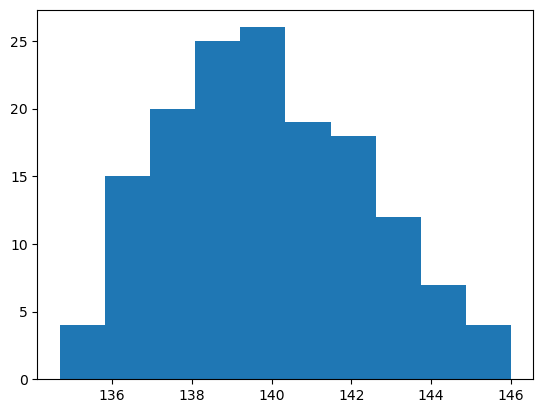

In [6]:
plt.hist(df['temp_1'])


The histogram for temp_1 is slightly skewed below the median of 140 degrees

Next I plot the data for temp 2

(array([ 3.,  5., 10., 16., 30., 48., 25.,  7.,  3.,  3.]),
 array([132.5 , 133.96, 135.42, 136.88, 138.34, 139.8 , 141.26, 142.72,
        144.18, 145.64, 147.1 ]),
 <BarContainer object of 10 artists>)

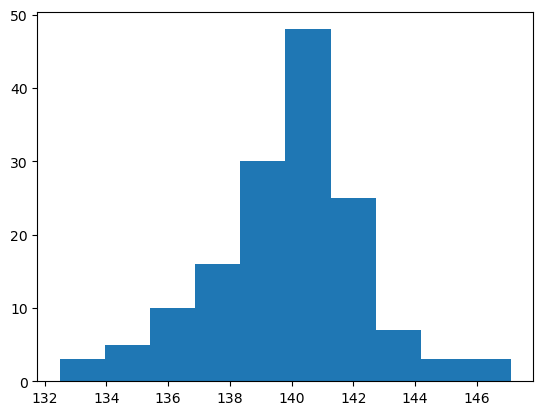

In [7]:
plt.hist(df['temp_2'])

Again, we can see the temperature is skewed below the median

(array([ 5., 10.,  9., 22., 28., 33., 20., 12.,  6.,  5.]),
 array([-1.67 , -0.682,  0.306,  1.294,  2.282,  3.27 ,  4.258,  5.246,
         6.234,  7.222,  8.21 ]),
 <BarContainer object of 10 artists>)

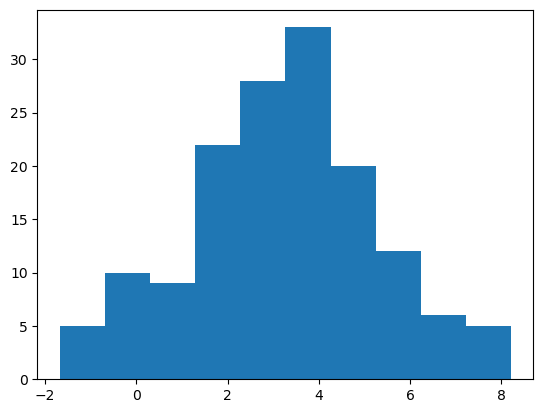

In [8]:
plt.hist(df['speed'])

As can be seen in the plot above, there is a slightly skewed normal distribution but also some distinct outliers for the speed variable. This requires further investigation and could be due to a number of factors such as the operator noticing that there were creases appearing on the material or slowing down to check blemishes.

(array([19., 44., 21., 22., 14., 17.,  0.,  1.,  5.,  7.]),
 array([1.  , 1.28, 1.56, 1.84, 2.12, 2.4 , 2.68, 2.96, 3.24, 3.52, 3.8 ]),
 <BarContainer object of 10 artists>)

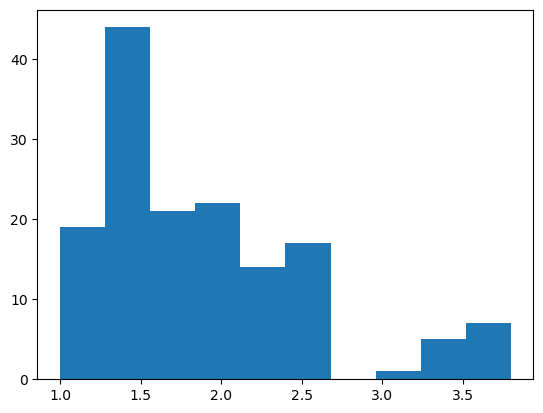

In [9]:
plt.hist(df['SG'])

The SG readings are showing a bi modal distribution. This could be due to the timing of the readings being taken, the liquid becoming thicker as the process moves on

To try to see if there are any other issues, the next plot is a scatter plot showing individual points of the temperatures. This seems to be well spread

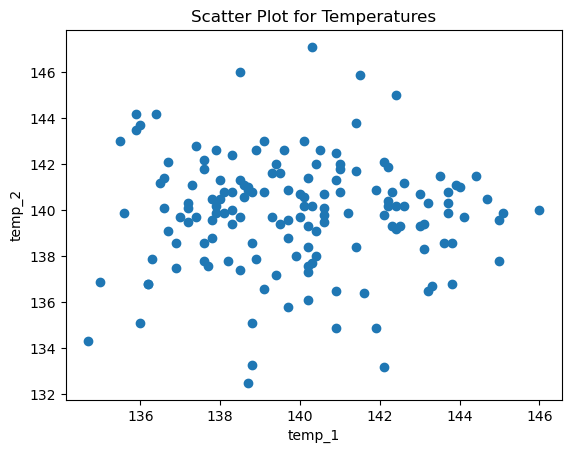

In [10]:
#plot a scatter plots for the  temp_1	temp_2	speed	SG	material
plt.scatter(df["temp_1"], df["temp_2"])
plt.xlabel("temp_1")
plt.ylabel("temp_2")
plt.title('Scatter Plot for Temperatures')
plt.savefig("Scatter temps")
plt.show()



The next scatter plot shows the speed and Specific gravity. There appear to be some outliers towards the higher end of the scale

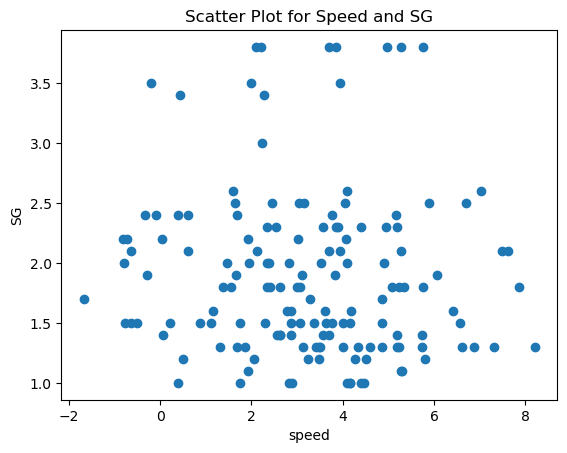

In [11]:
plt.scatter(df["speed"], df["SG"])
plt.xlabel("speed")
plt.ylabel("SG")
plt.title('Scatter Plot for Speed and SG')
plt.savefig("Scatter speed and SG")

The next section gives a better view of the process. 

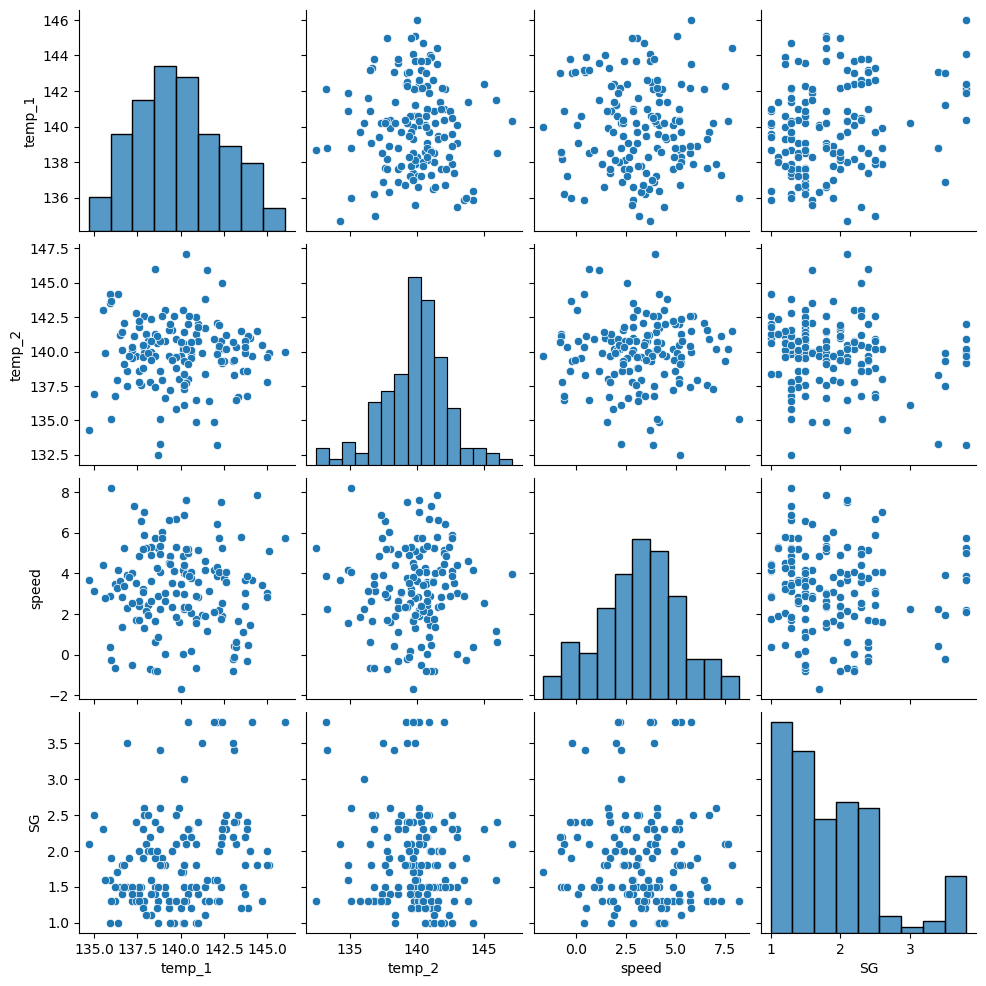

In [12]:

sns.pairplot(df)

As can be seen from the plot above, the temperature and speed settings are close to the normal distribution, the Specific Gravity of the liquid doesn't follow the normal expected distribution and is allowed to get "thick" at times and this would need further investigation

## Conclusions

The process seems to be stable but the temperature ranges could be brought down to ensure that any over temp is not reached. Also, it could be recommended that the Specific Gravity of the liquid solution is monitored carefully to ensure it is kept within process parameters. This is difficult as there is no automatic recording of the data and it is done manually by an operator. Other improvements to this project would include taking many more readings throughout the process to be able to see the fluctuations more clearly.  